In [118]:
import mod
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [119]:
def solve_1step(alpha,nu,psi,s,vertices,t):
    n=len(vertices)
    
    ## generar matriz
    M=np.zeros((n,n))
    
    for i in range(n):
        vecinos = vertices[i][2:]
        n_vecinos=len(vecinos)
        phi=0
        media = 0
        for vecino in vecinos:
            media+=s[vecino]
        media=media*1.0/n_vecinos

        if s[i] > media:
            phi=nu
        else:
            phi=1-nu
        M[i][i]=(psi*phi-1)*alpha    
        for j in vecinos:
            M[i][j]=alpha*(1.0/n_vecinos)*psi*(1-phi)
            
#     print(M)
        
    val, vec = LA.eig(M)
    A_0=np.zeros((n,n))
    A_1=np.zeros((n,n))
    
    salto=[]
#     t=1
    for i in range(n):
        if i not in salto:
            if np.imag(val[i]) != 0:
                j=np.argwhere(val == np.conj(val[i]))[0][0]
                salto.append(j)
                A_0[:,i]=np.real(vec[:,i])
                A_0[:,j]=np.imag(vec[:,j])
                A_1[:,i]=np.exp(t*np.real(val[i]))*(np.real(vec[:,i])*np.cos(t*np.imag(val[i]))-np.imag(vec[:,i])*np.sin(t*np.imag(val[i])))
                A_1[:,j]=np.exp(t*np.real(val[i]))*(np.real(vec[:,i])*np.sin(t*np.imag(val[i]))+np.imag(vec[:,i])*np.cos(t*np.imag(val[i])))
            else:
                A_0[:,i]=np.real(vec[:,i])
                A_1[:,i]=np.real(vec[:,i])*np.exp(t*np.real(val[i]))
                
    coef=np.linalg.solve(A_0, s)
    x_0=np.dot(A_0,coef)
    solucion=np.dot(A_1,coef)
    
    s = psi * s


    #copia
    scopia=s

    for k in range(n):
        vecinos = vertices[k][2:]
        media = 0
        for vecino in vecinos:
            media+=scopia[vecino]
        media=media*1.0/len(vecinos)

        if scopia[k] > media:
            s[k]=nu*scopia[k]+(1-nu)*media
        else:
            s[k]=(1-nu)*scopia[k]+nu*media
    
    
    
    for k in range(n):
        X = np.random.poisson(vertices[k][1])
        # posicion hubo crimen o no
        I = 0
        if X >= 1:  # si hubo al menos un crimen I=1 de lo contrario I=0
            I = 1
        # efecto del crimen en la percepcion de k para el siguiente periodo
        solucion[k] = I + (1 - I) * solucion[k]
        s[k] = I + (1 - I) * s[k]
    
    
    return solucion, M,s,val,vec

In [120]:
vertices=mod.read("small.graph")[0]
for i in range(len(vertices)):
    if vertices[i][1] == 0:
        vertices[i][1] = 0
#     elif vertices[i][1] == 1:
#         vertices[i][1] = 0.05
    else:
        vertices[i][1] = 0.5
# x_0=np.random.rand(len(vertices))
x_0=np.zeros(len(vertices))

In [121]:
vertices

[[0, 0.5, 1],
 [1, 0.5, 0, 2],
 [2, 0.5, 1, 3],
 [3, 0.5, 2],
 [4, 0, 5, 6, 7],
 [5, 0, 4, 7],
 [6, 0, 4],
 [7, 0, 4, 5, 8],
 [8, 0, 7, 7]]

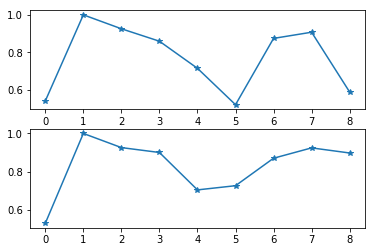

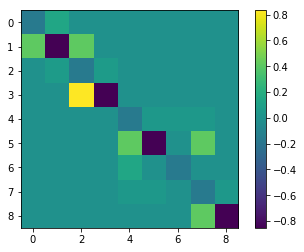

Det:-1.7910816579667197e-06
[0.539 1.    0.925 0.859 0.714 0.519 0.874 0.907 0.587]
[0.529 1.    0.926 0.9   0.704 0.726 0.87  0.924 0.898]
[-0.02  -0.125 -1.    -0.895 -0.92  -0.865 -0.029 -0.257 -0.136]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.05   0.04   0.509 -0.488  0.165]
 [ 0.     0.     0.     0.     0.84  -0.536  0.471 -0.162 -0.189]
 [ 0.     0.     0.     0.     0.01  -0.008  0.542  0.799  0.784]
 [ 0.     0.     0.     0.    -0.086 -0.024  0.424  0.257 -0.491]
 [ 0.     0.     0.     0.     0.533  0.843  0.214  0.179 -0.285]]


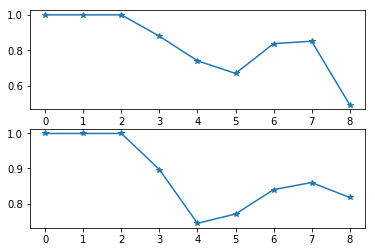

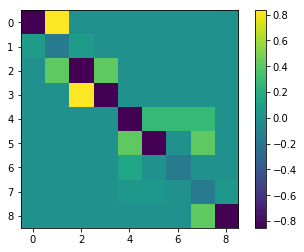

Det:-2.7547286542300947e-05
[1.    1.    1.    0.88  0.742 0.671 0.838 0.852 0.495]
[1.    1.    1.    0.897 0.743 0.77  0.84  0.86  0.817]
[-1.455 -0.932 -0.02  -0.319 -1.213 -0.886 -0.618 -0.034 -0.142]
[[ 0.05   0.991 -0.5   -0.224  0.     0.     0.     0.     0.   ]
 [-0.036 -0.094 -0.5   -0.144  0.     0.     0.     0.     0.   ]
 [ 0.585 -0.009 -0.5    0.52   0.     0.     0.     0.     0.   ]
 [-0.809  0.096 -0.5    0.811  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.648  0.071 -0.556 -0.492  0.152]
 [ 0.     0.     0.     0.     0.756  0.084 -0.773 -0.472 -0.126]
 [ 0.     0.     0.     0.     0.091 -0.015  0.181 -0.543  0.883]
 [ 0.     0.     0.     0.    -0.005 -0.078  0.121 -0.436 -0.368]
 [ 0.     0.     0.     0.     0.006  0.991  0.215 -0.222 -0.215]]


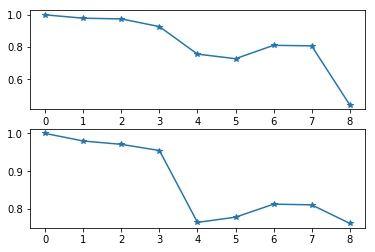

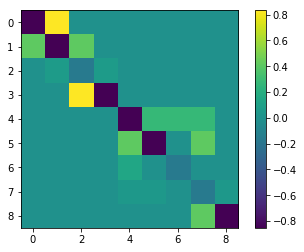

Det:-2.7547286542300947e-05
[1.    0.979 0.975 0.927 0.756 0.728 0.811 0.808 0.442]
[1.    0.98  0.971 0.955 0.765 0.778 0.813 0.811 0.762]
[-1.455 -0.02  -0.319 -0.932 -1.213 -0.886 -0.618 -0.034 -0.142]
[[ 0.809  0.5   -0.811  0.096  0.     0.     0.     0.     0.   ]
 [-0.585  0.5   -0.52  -0.009  0.     0.     0.     0.     0.   ]
 [ 0.036  0.5    0.144 -0.094  0.     0.     0.     0.     0.   ]
 [-0.05   0.5    0.224  0.991  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.648  0.071 -0.556 -0.492  0.152]
 [ 0.     0.     0.     0.     0.756  0.084 -0.773 -0.472 -0.126]
 [ 0.     0.     0.     0.     0.091 -0.015  0.181 -0.543  0.883]
 [ 0.     0.     0.     0.    -0.005 -0.078  0.121 -0.436 -0.368]
 [ 0.     0.     0.     0.     0.006  0.991  0.215 -0.222 -0.215]]


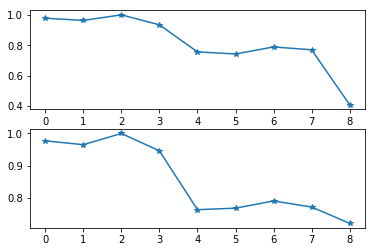

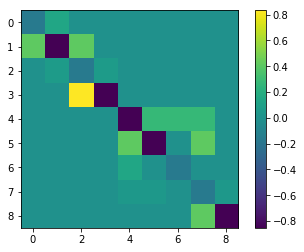

Det:-7.126995116295572e-06
[0.978 0.964 1.    0.934 0.756 0.743 0.789 0.77  0.409]
[0.977 0.965 1.    0.946 0.763 0.768 0.79  0.771 0.72 ]
[-0.02  -0.125 -1.    -0.895 -1.213 -0.886 -0.618 -0.034 -0.142]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.648  0.071 -0.556 -0.492  0.152]
 [ 0.     0.     0.     0.     0.756  0.084 -0.773 -0.472 -0.126]
 [ 0.     0.     0.     0.     0.091 -0.015  0.181 -0.543  0.883]
 [ 0.     0.     0.     0.    -0.005 -0.078  0.121 -0.436 -0.368]
 [ 0.     0.     0.     0.     0.006  0.991  0.215 -0.222 -0.215]]


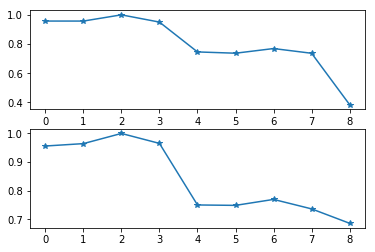

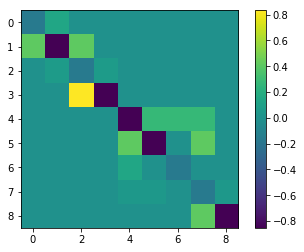

Det:-7.126995116295572e-06
[0.958 0.957 1.    0.95  0.746 0.737 0.769 0.737 0.385]
[0.956 0.964 1.    0.965 0.75  0.749 0.77  0.736 0.686]
[-0.02  -0.125 -1.    -0.895 -1.213 -0.886 -0.618 -0.034 -0.142]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.648  0.071 -0.556 -0.492  0.152]
 [ 0.     0.     0.     0.     0.756  0.084 -0.773 -0.472 -0.126]
 [ 0.     0.     0.     0.     0.091 -0.015  0.181 -0.543  0.883]
 [ 0.     0.     0.     0.    -0.005 -0.078  0.121 -0.436 -0.368]
 [ 0.     0.     0.     0.     0.006  0.991  0.215 -0.222 -0.215]]


In [122]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(1,0.85,0.98,a,vertices,1)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

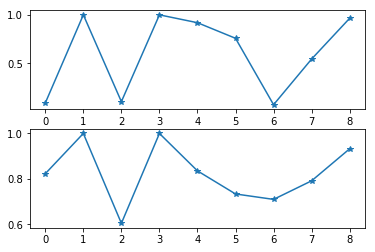

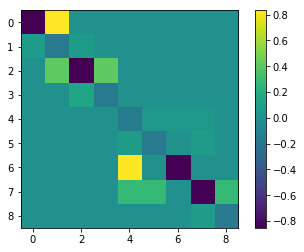

Det:-1.6586082241740446e-06
[0.092 1.    0.106 1.    0.919 0.758 0.074 0.545 0.965]
[0.823 1.    0.605 1.    0.836 0.734 0.71  0.792 0.933]
[-1.    -0.895 -0.02  -0.125 -0.942 -0.887 -0.03  -0.201 -0.147]
[[-0.696 -0.89  -0.5   -0.444  0.     0.     0.     0.     0.   ]
 [ 0.123  0.045 -0.5   -0.388  0.     0.     0.     0.     0.   ]
 [-0.696  0.445 -0.5    0.222  0.     0.     0.     0.     0.   ]
 [ 0.123 -0.09  -0.5    0.776  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.085  0.037  0.512  0.408 -0.248]
 [ 0.     0.     0.     0.    -0.048 -0.046  0.497 -0.731 -0.043]
 [ 0.     0.     0.     0.     0.797 -0.91   0.518  0.521 -0.293]
 [ 0.     0.     0.     0.     0.593  0.409  0.416 -0.071  0.237]
 [ 0.     0.     0.     0.    -0.056 -0.042  0.223  0.155  0.892]]


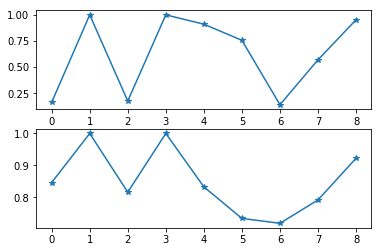

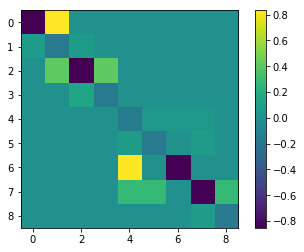

Det:-1.6586082241740446e-06
[0.163 1.    0.176 1.    0.911 0.757 0.141 0.57  0.953]
[0.846 1.    0.816 1.    0.833 0.734 0.719 0.792 0.922]
[-1.    -0.895 -0.02  -0.125 -0.942 -0.887 -0.03  -0.201 -0.147]
[[-0.696 -0.89  -0.5   -0.444  0.     0.     0.     0.     0.   ]
 [ 0.123  0.045 -0.5   -0.388  0.     0.     0.     0.     0.   ]
 [-0.696  0.445 -0.5    0.222  0.     0.     0.     0.     0.   ]
 [ 0.123 -0.09  -0.5    0.776  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.085  0.037  0.512  0.408 -0.248]
 [ 0.     0.     0.     0.    -0.048 -0.046  0.497 -0.731 -0.043]
 [ 0.     0.     0.     0.     0.797 -0.91   0.518  0.521 -0.293]
 [ 0.     0.     0.     0.     0.593  0.409  0.416 -0.071  0.237]
 [ 0.     0.     0.     0.    -0.056 -0.042  0.223  0.155  0.892]]


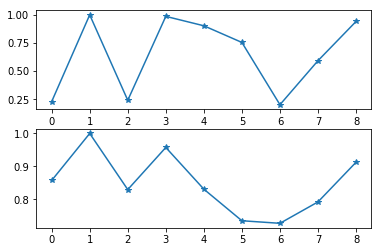

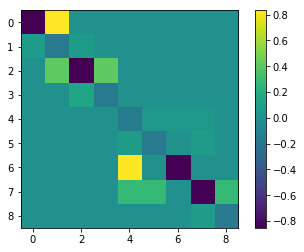

Det:-1.6586082241740446e-06
[0.229 1.    0.241 0.986 0.903 0.755 0.202 0.593 0.941]
[0.857 1.    0.829 0.957 0.831 0.734 0.727 0.792 0.912]
[-1.    -0.895 -0.02  -0.125 -0.942 -0.887 -0.03  -0.201 -0.147]
[[-0.696 -0.89  -0.5   -0.444  0.     0.     0.     0.     0.   ]
 [ 0.123  0.045 -0.5   -0.388  0.     0.     0.     0.     0.   ]
 [-0.696  0.445 -0.5    0.222  0.     0.     0.     0.     0.   ]
 [ 0.123 -0.09  -0.5    0.776  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.085  0.037  0.512  0.408 -0.248]
 [ 0.     0.     0.     0.    -0.048 -0.046  0.497 -0.731 -0.043]
 [ 0.     0.     0.     0.     0.797 -0.91   0.518  0.521 -0.293]
 [ 0.     0.     0.     0.     0.593  0.409  0.416 -0.071  0.237]
 [ 0.     0.     0.     0.    -0.056 -0.042  0.223  0.155  0.892]]


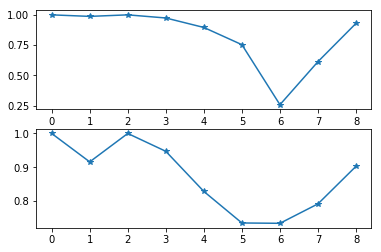

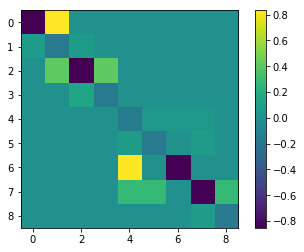

Det:-1.6586082241740446e-06
[1.    0.987 1.    0.974 0.896 0.753 0.257 0.613 0.93 ]
[1.    0.916 1.    0.947 0.828 0.735 0.734 0.791 0.903]
[-1.    -0.895 -0.02  -0.125 -0.942 -0.887 -0.03  -0.201 -0.147]
[[-0.696 -0.89  -0.5   -0.444  0.     0.     0.     0.     0.   ]
 [ 0.123  0.045 -0.5   -0.388  0.     0.     0.     0.     0.   ]
 [-0.696  0.445 -0.5    0.222  0.     0.     0.     0.     0.   ]
 [ 0.123 -0.09  -0.5    0.776  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.085  0.037  0.512  0.408 -0.248]
 [ 0.     0.     0.     0.    -0.048 -0.046  0.497 -0.731 -0.043]
 [ 0.     0.     0.     0.     0.797 -0.91   0.518  0.521 -0.293]
 [ 0.     0.     0.     0.     0.593  0.409  0.416 -0.071  0.237]
 [ 0.     0.     0.     0.    -0.056 -0.042  0.223  0.155  0.892]]


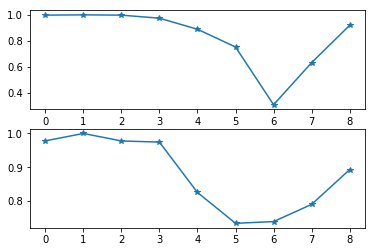

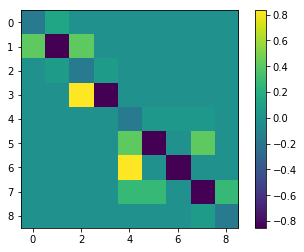

Det:-7.2139470624123334e-06
[0.998 1.    0.998 0.974 0.889 0.752 0.307 0.632 0.919]
[0.978 1.    0.978 0.974 0.826 0.735 0.74  0.79  0.893]
[-0.02  -0.125 -1.    -0.895 -0.033 -0.148 -0.594 -0.915 -1.203]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.52   0.268  0.109 -0.074  0.007]
 [ 0.     0.     0.     0.     0.475  0.021 -0.733  0.066 -0.768]
 [ 0.     0.     0.     0.     0.529  0.317  0.35   0.993 -0.016]
 [ 0.     0.     0.     0.     0.415 -0.232 -0.565  0.064  0.639]
 [ 0.     0.     0.     0.     0.228 -0.879  0.097 -0.006 -0.045]]


In [116]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(1,0.85,0.98,a,vertices,0.1)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

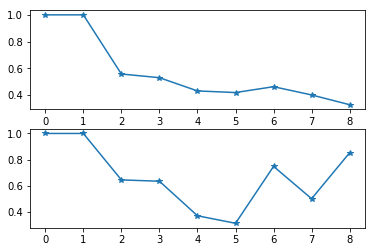

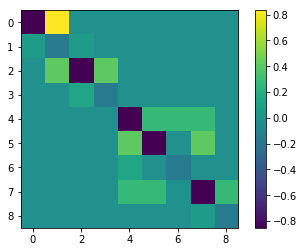

Det:-5.894231807217528e-06
[1.    1.    0.558 0.53  0.431 0.419 0.463 0.401 0.328]
[1.    1.    0.644 0.634 0.369 0.312 0.748 0.5   0.852]
[-1.    -0.895 -0.02  -0.125 -1.226 -1.161 -0.326 -0.041 -0.14 ]
[[-0.696 -0.89  -0.5   -0.444  0.     0.     0.     0.     0.   ]
 [ 0.123  0.045 -0.5   -0.388  0.     0.     0.     0.     0.   ]
 [-0.696  0.445 -0.5    0.222  0.     0.     0.     0.     0.   ]
 [ 0.123 -0.09  -0.5    0.776  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.431  0.662  0.399 -0.491 -0.119]
 [ 0.     0.     0.     0.     0.841  0.099  0.674 -0.46   0.082]
 [ 0.     0.     0.     0.     0.06  -0.098 -0.37  -0.572 -0.647]
 [ 0.     0.     0.     0.    -0.322 -0.735  0.454 -0.406  0.259]
 [ 0.     0.     0.     0.     0.022  0.054 -0.21  -0.236  0.703]]


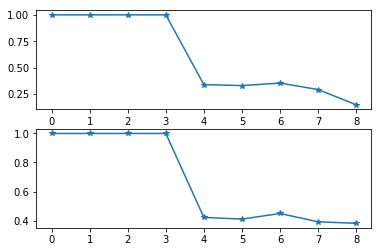

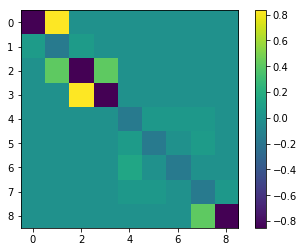

Det:-1.5324761300319905e-06
[1.    1.    1.    1.    0.338 0.329 0.353 0.292 0.148]
[1.    1.    1.    1.    0.422 0.41  0.449 0.392 0.381]
[-1.455 -0.932 -0.02  -0.319 -0.882 -0.027 -0.272 -0.129 -0.211]
[[ 0.05   0.991 -0.5   -0.224  0.     0.     0.     0.     0.   ]
 [-0.036 -0.094 -0.5   -0.144  0.     0.     0.     0.     0.   ]
 [ 0.585 -0.009 -0.5    0.52   0.     0.     0.     0.     0.   ]
 [-0.809  0.096 -0.5    0.811  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


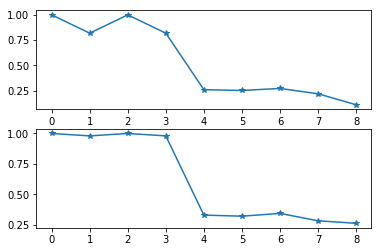

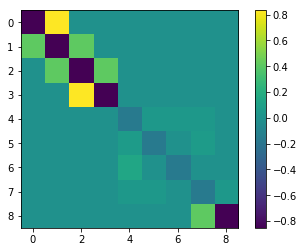

Det:-3.312115812743442e-06
[1.    0.819 1.    0.819 0.26  0.252 0.272 0.219 0.111]
[1.    0.98  1.    0.98  0.33  0.32  0.343 0.283 0.262]
[-1.686 -1.269 -0.02  -0.437 -0.882 -0.027 -0.272 -0.129 -0.211]
[[-0.5   -0.632  0.5   -0.632  0.     0.     0.     0.     0.   ]
 [ 0.5    0.316  0.5   -0.316  0.     0.     0.     0.     0.   ]
 [-0.5    0.316  0.5    0.316  0.     0.     0.     0.     0.   ]
 [ 0.5   -0.632  0.5    0.632  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


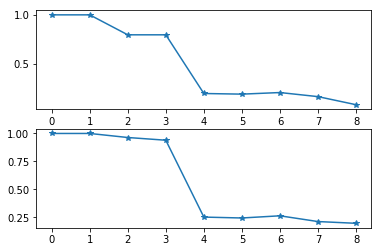

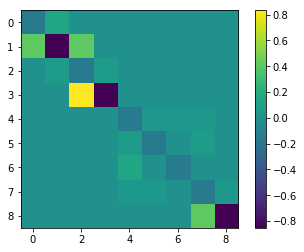

Det:-3.96480062666283e-07
[1.    1.    0.796 0.796 0.198 0.192 0.208 0.166 0.084]
[1.    1.    0.964 0.94  0.253 0.245 0.264 0.213 0.197]
[-0.02  -0.125 -1.    -0.895 -0.882 -0.027 -0.272 -0.129 -0.211]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


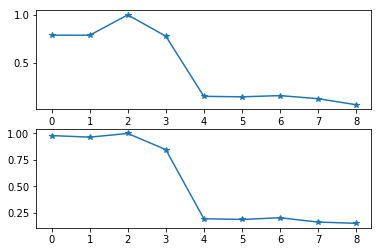

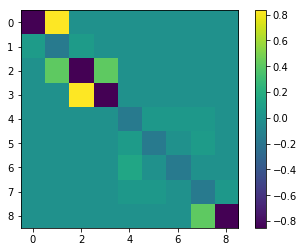

Det:-1.5324761300319905e-06
[0.788 0.788 1.    0.778 0.151 0.146 0.159 0.126 0.064]
[0.98  0.965 1.    0.847 0.193 0.186 0.202 0.161 0.15 ]
[-1.455 -0.932 -0.02  -0.319 -0.882 -0.027 -0.272 -0.129 -0.211]
[[ 0.05   0.991 -0.5   -0.224  0.     0.     0.     0.     0.   ]
 [-0.036 -0.094 -0.5   -0.144  0.     0.     0.     0.     0.   ]
 [ 0.585 -0.009 -0.5    0.52   0.     0.     0.     0.     0.   ]
 [-0.809  0.096 -0.5    0.811  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


In [117]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(1,0.85,0.98,a,vertices,10)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

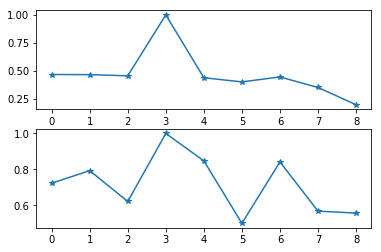

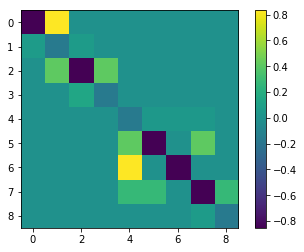

Det:-7.2139470624123334e-06
[0.465 0.464 0.454 1.    0.436 0.399 0.443 0.349 0.195]
[0.723 0.793 0.621 1.    0.847 0.499 0.841 0.567 0.556]
[-1.    -0.895 -0.02  -0.125 -0.033 -0.148 -0.594 -0.915 -1.203]
[[-0.696 -0.89  -0.5   -0.444  0.     0.     0.     0.     0.   ]
 [ 0.123  0.045 -0.5   -0.388  0.     0.     0.     0.     0.   ]
 [-0.696  0.445 -0.5    0.222  0.     0.     0.     0.     0.   ]
 [ 0.123 -0.09  -0.5    0.776  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.52   0.268  0.109 -0.074  0.007]
 [ 0.     0.     0.     0.     0.475  0.021 -0.733  0.066 -0.768]
 [ 0.     0.     0.     0.     0.529  0.317  0.35   0.993 -0.016]
 [ 0.     0.     0.     0.     0.415 -0.232 -0.565  0.064  0.639]
 [ 0.     0.     0.     0.     0.228 -0.879  0.097 -0.006 -0.045]]


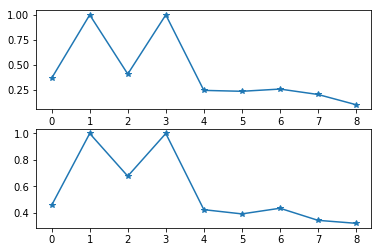

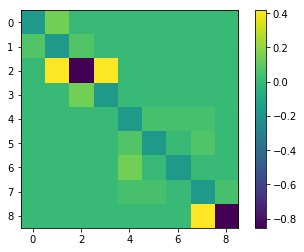

Det:-9.464373747511013e-08
[0.369 1.    0.41  1.    0.247 0.238 0.26  0.206 0.104]
[0.456 1.    0.676 1.    0.422 0.39  0.433 0.341 0.318]
[-0.968 -0.259 -0.02  -0.106 -0.882 -0.027 -0.272 -0.129 -0.211]
[[ 0.017 -0.803  0.5   -0.491  0.     0.     0.     0.     0.   ]
 [-0.091  0.505  0.5   -0.203  0.     0.     0.     0.     0.   ]
 [ 0.979  0.168  0.5    0.323  0.     0.     0.     0.     0.   ]
 [-0.18  -0.266  0.5    0.783  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


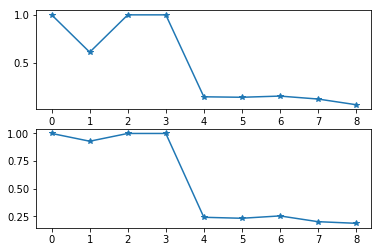

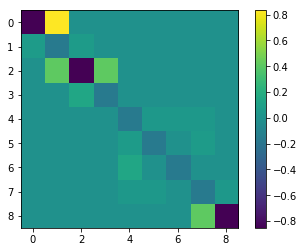

Det:-3.96480062666283e-07
[1.    0.609 1.    1.    0.143 0.138 0.15  0.12  0.06 ]
[1.    0.93  1.    1.    0.24  0.231 0.252 0.2   0.185]
[-1.    -0.895 -0.02  -0.125 -0.882 -0.027 -0.272 -0.129 -0.211]
[[-0.696 -0.89  -0.5   -0.444  0.     0.     0.     0.     0.   ]
 [ 0.123  0.045 -0.5   -0.388  0.     0.     0.     0.     0.   ]
 [-0.696  0.445 -0.5    0.222  0.     0.     0.     0.     0.   ]
 [ 0.123 -0.09  -0.5    0.776  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


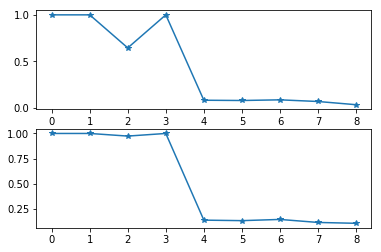

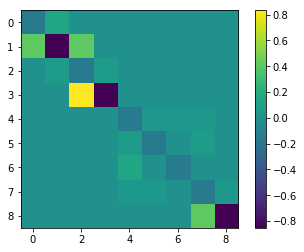

Det:-3.96480062666283e-07
[1.    1.    0.645 1.    0.083 0.08  0.087 0.07  0.035]
[1.    1.    0.974 1.    0.139 0.134 0.146 0.116 0.108]
[-0.02  -0.125 -1.    -0.895 -0.882 -0.027 -0.272 -0.129 -0.211]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


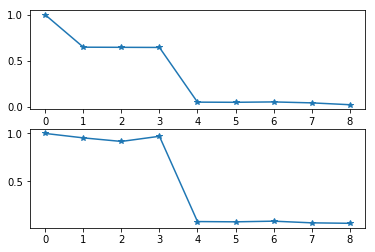

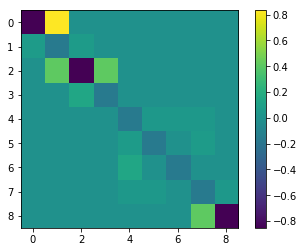

Det:-3.96480062666283e-07
[1.    0.647 0.646 0.645 0.048 0.047 0.051 0.04  0.02 ]
[1.    0.954 0.917 0.971 0.081 0.078 0.085 0.068 0.063]
[-1.    -0.895 -0.02  -0.125 -0.882 -0.027 -0.272 -0.129 -0.211]
[[-0.696 -0.89  -0.5   -0.444  0.     0.     0.     0.     0.   ]
 [ 0.123  0.045 -0.5   -0.388  0.     0.     0.     0.     0.   ]
 [-0.696  0.445 -0.5    0.222  0.     0.     0.     0.     0.   ]
 [ 0.123 -0.09  -0.5    0.776  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


In [123]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(1,0.85,0.98,a,vertices,20)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

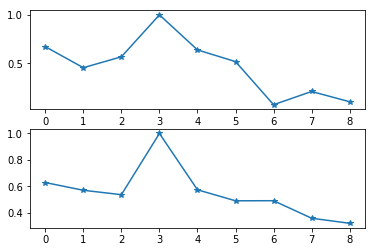

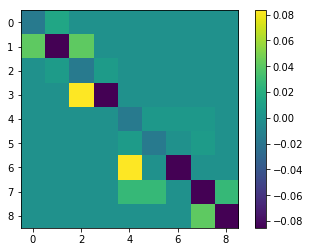

Det:-8.11717017852713e-15
[0.672 0.454 0.567 1.    0.638 0.517 0.072 0.209 0.103]
[0.628 0.57  0.536 1.    0.573 0.49  0.491 0.358 0.32 ]
[-0.002 -0.012 -0.1   -0.09  -0.121 -0.091 -0.003 -0.02  -0.055]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.032 -0.066 -0.515 -0.436 -0.046]
 [ 0.     0.     0.     0.     0.043  0.007 -0.499  0.687 -0.104]
 [ 0.     0.     0.     0.    -0.075  0.996 -0.521 -0.555 -0.125]
 [ 0.     0.     0.     0.    -0.648 -0.008 -0.413  0.145  0.584]
 [ 0.     0.     0.     0.     0.756  0.06  -0.209  0.092  0.794]]


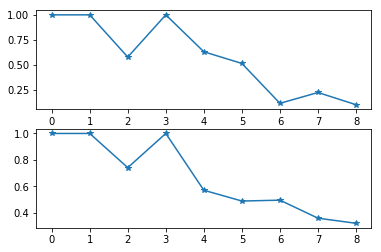

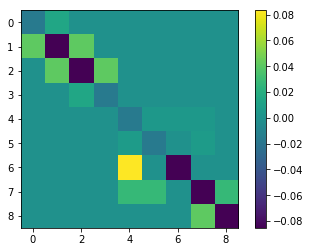

Det:-6.385600846827805e-15
[1.    1.    0.579 1.    0.632 0.515 0.117 0.225 0.103]
[1.    1.    0.742 1.    0.571 0.489 0.496 0.36  0.321]
[-0.132 -0.058 -0.002 -0.011 -0.121 -0.091 -0.003 -0.02  -0.055]
[[-0.089  0.235  0.5   -0.665  0.     0.     0.     0.     0.   ]
 [ 0.701 -0.667  0.5   -0.24   0.     0.     0.     0.     0.   ]
 [-0.701 -0.667  0.5    0.24   0.     0.     0.     0.     0.   ]
 [ 0.089  0.235  0.5    0.665  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.032 -0.066 -0.515 -0.436 -0.046]
 [ 0.     0.     0.     0.     0.043  0.007 -0.499  0.687 -0.104]
 [ 0.     0.     0.     0.    -0.075  0.996 -0.521 -0.555 -0.125]
 [ 0.     0.     0.     0.    -0.648 -0.008 -0.413  0.145  0.584]
 [ 0.     0.     0.     0.     0.756  0.06  -0.209  0.092  0.794]]


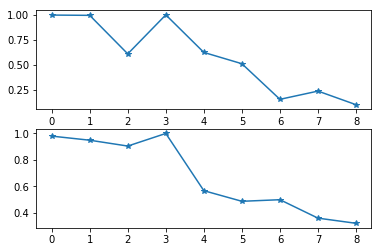

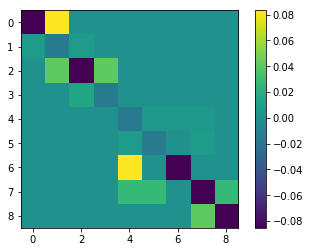

Det:-8.11717017852713e-15
[0.998 0.995 0.611 1.    0.625 0.513 0.158 0.24  0.104]
[0.98  0.949 0.905 1.    0.568 0.488 0.5   0.361 0.322]
[-0.1   -0.09  -0.002 -0.012 -0.121 -0.091 -0.003 -0.02  -0.055]
[[-0.696 -0.89  -0.5   -0.444  0.     0.     0.     0.     0.   ]
 [ 0.123  0.045 -0.5   -0.388  0.     0.     0.     0.     0.   ]
 [-0.696  0.445 -0.5    0.222  0.     0.     0.     0.     0.   ]
 [ 0.123 -0.09  -0.5    0.776  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.032 -0.066 -0.515 -0.436 -0.046]
 [ 0.     0.     0.     0.     0.043  0.007 -0.499  0.687 -0.104]
 [ 0.     0.     0.     0.    -0.075  0.996 -0.521 -0.555 -0.125]
 [ 0.     0.     0.     0.    -0.648 -0.008 -0.413  0.145  0.584]
 [ 0.     0.     0.     0.     0.756  0.06  -0.209  0.092  0.794]]


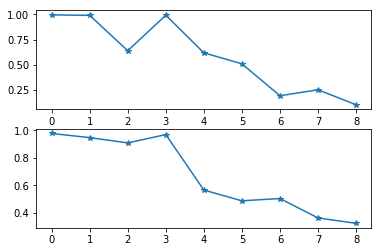

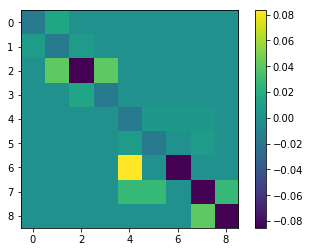

Det:-1.9376493189871578e-15
[0.996 0.99  0.64  0.993 0.62  0.511 0.194 0.253 0.105]
[0.978 0.947 0.909 0.969 0.566 0.487 0.504 0.362 0.323]
[-0.097 -0.026 -0.002 -0.011 -0.121 -0.091 -0.003 -0.02  -0.055]
[[ 0.017 -0.803  0.5   -0.491  0.     0.     0.     0.     0.   ]
 [-0.091  0.505  0.5   -0.203  0.     0.     0.     0.     0.   ]
 [ 0.979  0.168  0.5    0.323  0.     0.     0.     0.     0.   ]
 [-0.18  -0.266  0.5    0.783  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.032 -0.066 -0.515 -0.436 -0.046]
 [ 0.     0.     0.     0.     0.043  0.007 -0.499  0.687 -0.104]
 [ 0.     0.     0.     0.    -0.075  0.996 -0.521 -0.555 -0.125]
 [ 0.     0.     0.     0.    -0.648 -0.008 -0.413  0.145  0.584]
 [ 0.     0.     0.     0.     0.756  0.06  -0.209  0.092  0.794]]


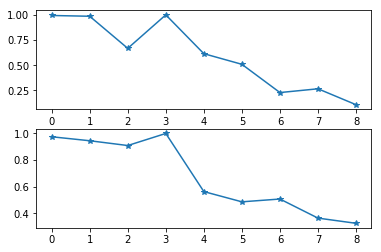

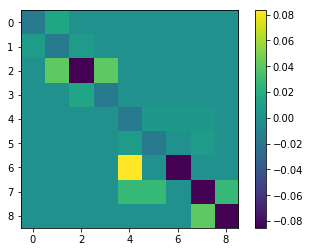

Det:-1.9376493189871578e-15
[0.994 0.986 0.667 1.    0.614 0.509 0.228 0.265 0.107]
[0.975 0.945 0.909 1.    0.563 0.486 0.507 0.364 0.325]
[-0.097 -0.026 -0.002 -0.011 -0.121 -0.091 -0.003 -0.02  -0.055]
[[ 0.017 -0.803  0.5   -0.491  0.     0.     0.     0.     0.   ]
 [-0.091  0.505  0.5   -0.203  0.     0.     0.     0.     0.   ]
 [ 0.979  0.168  0.5    0.323  0.     0.     0.     0.     0.   ]
 [-0.18  -0.266  0.5    0.783  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.032 -0.066 -0.515 -0.436 -0.046]
 [ 0.     0.     0.     0.     0.043  0.007 -0.499  0.687 -0.104]
 [ 0.     0.     0.     0.    -0.075  0.996 -0.521 -0.555 -0.125]
 [ 0.     0.     0.     0.    -0.648 -0.008 -0.413  0.145  0.584]
 [ 0.     0.     0.     0.     0.756  0.06  -0.209  0.092  0.794]]


In [124]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(0.1,0.85,0.98,a,vertices,1)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

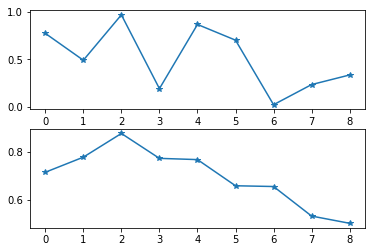

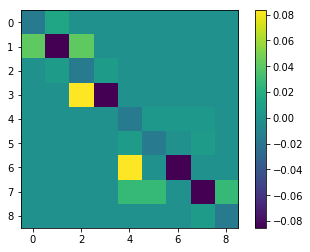

Det:-1.6586082241740457e-15
[0.772 0.489 0.967 0.19  0.866 0.701 0.02  0.232 0.334]
[0.715 0.779 0.879 0.774 0.769 0.658 0.655 0.531 0.5  ]
[-0.002 -0.012 -0.1   -0.09  -0.094 -0.089 -0.003 -0.02  -0.015]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.085  0.037  0.512  0.408 -0.248]
 [ 0.     0.     0.     0.    -0.048 -0.046  0.497 -0.731 -0.043]
 [ 0.     0.     0.     0.     0.797 -0.91   0.518  0.521 -0.293]
 [ 0.     0.     0.     0.     0.593  0.409  0.416 -0.071  0.237]
 [ 0.     0.     0.     0.    -0.056 -0.042  0.223  0.155  0.892]]


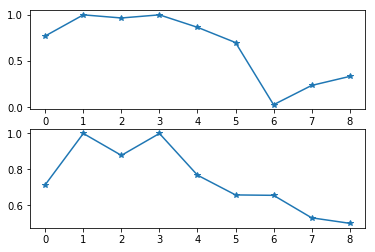

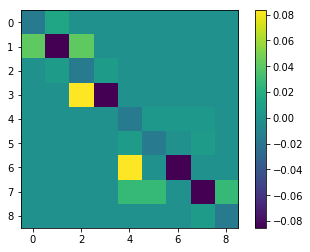

Det:-1.6586082241740457e-15
[0.772 1.    0.966 1.    0.865 0.7   0.027 0.236 0.333]
[0.715 1.    0.878 1.    0.768 0.658 0.656 0.531 0.5  ]
[-0.002 -0.012 -0.1   -0.09  -0.094 -0.089 -0.003 -0.02  -0.015]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.085  0.037  0.512  0.408 -0.248]
 [ 0.     0.     0.     0.    -0.048 -0.046  0.497 -0.731 -0.043]
 [ 0.     0.     0.     0.     0.797 -0.91   0.518  0.521 -0.293]
 [ 0.     0.     0.     0.     0.593  0.409  0.416 -0.071  0.237]
 [ 0.     0.     0.     0.    -0.056 -0.042  0.223  0.155  0.892]]


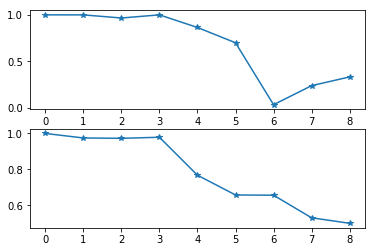

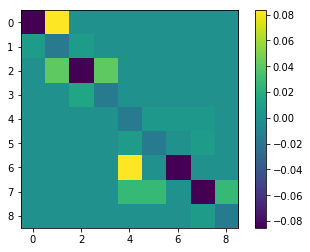

Det:-1.6586082241740457e-15
[1.    1.    0.966 1.    0.864 0.7   0.034 0.239 0.333]
[1.    0.975 0.973 0.979 0.768 0.658 0.657 0.531 0.501]
[-0.1   -0.09  -0.002 -0.012 -0.094 -0.089 -0.003 -0.02  -0.015]
[[-0.696 -0.89  -0.5   -0.444  0.     0.     0.     0.     0.   ]
 [ 0.123  0.045 -0.5   -0.388  0.     0.     0.     0.     0.   ]
 [-0.696  0.445 -0.5    0.222  0.     0.     0.     0.     0.   ]
 [ 0.123 -0.09  -0.5    0.776  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.085  0.037  0.512  0.408 -0.248]
 [ 0.     0.     0.     0.    -0.048 -0.046  0.497 -0.731 -0.043]
 [ 0.     0.     0.     0.     0.797 -0.91   0.518  0.521 -0.293]
 [ 0.     0.     0.     0.     0.593  0.409  0.416 -0.071  0.237]
 [ 0.     0.     0.     0.    -0.056 -0.042  0.223  0.155  0.892]]


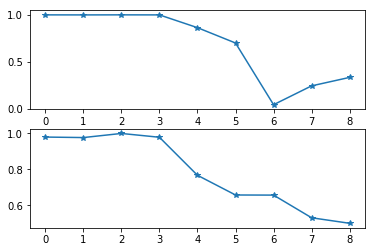

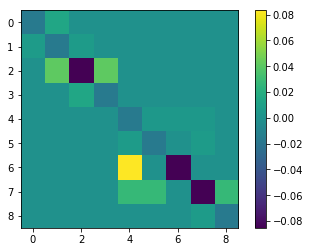

Det:-3.95926292704696e-16
[1.    0.999 1.    1.    0.863 0.699 0.041 0.242 0.333]
[0.98  0.977 1.    0.979 0.768 0.658 0.657 0.532 0.501]
[-0.097 -0.026 -0.002 -0.011 -0.094 -0.089 -0.003 -0.02  -0.015]
[[ 0.017 -0.803  0.5   -0.491  0.     0.     0.     0.     0.   ]
 [-0.091  0.505  0.5   -0.203  0.     0.     0.     0.     0.   ]
 [ 0.979  0.168  0.5    0.323  0.     0.     0.     0.     0.   ]
 [-0.18  -0.266  0.5    0.783  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.085  0.037  0.512  0.408 -0.248]
 [ 0.     0.     0.     0.    -0.048 -0.046  0.497 -0.731 -0.043]
 [ 0.     0.     0.     0.     0.797 -0.91   0.518  0.521 -0.293]
 [ 0.     0.     0.     0.     0.593  0.409  0.416 -0.071  0.237]
 [ 0.     0.     0.     0.    -0.056 -0.042  0.223  0.155  0.892]]


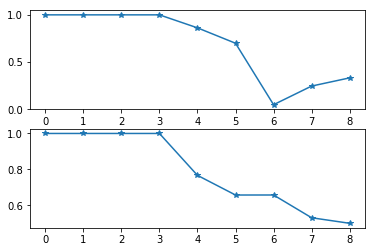

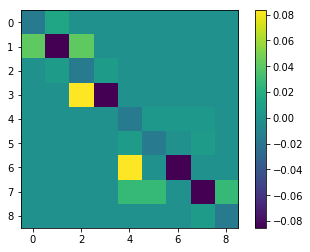

Det:-1.6586082241740457e-15
[1.    1.    1.    1.    0.862 0.699 0.048 0.245 0.332]
[1.    1.    1.    1.    0.767 0.658 0.658 0.532 0.501]
[-0.002 -0.012 -0.1   -0.09  -0.094 -0.089 -0.003 -0.02  -0.015]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.085  0.037  0.512  0.408 -0.248]
 [ 0.     0.     0.     0.    -0.048 -0.046  0.497 -0.731 -0.043]
 [ 0.     0.     0.     0.     0.797 -0.91   0.518  0.521 -0.293]
 [ 0.     0.     0.     0.     0.593  0.409  0.416 -0.071  0.237]
 [ 0.     0.     0.     0.    -0.056 -0.042  0.223  0.155  0.892]]


In [125]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(0.1,0.85,0.98,a,vertices,0.1)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

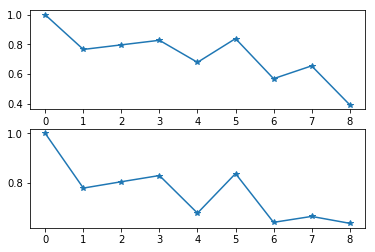

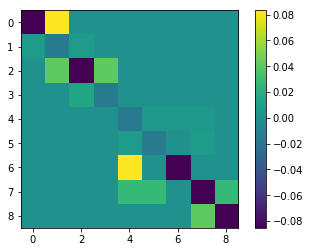

Det:-8.11717017852713e-15
[1.    0.766 0.797 0.828 0.679 0.84  0.569 0.655 0.393]
[1.    0.778 0.803 0.829 0.676 0.837 0.638 0.662 0.634]
[-0.1   -0.09  -0.002 -0.012 -0.121 -0.091 -0.003 -0.02  -0.055]
[[-0.696 -0.89  -0.5   -0.444  0.     0.     0.     0.     0.   ]
 [ 0.123  0.045 -0.5   -0.388  0.     0.     0.     0.     0.   ]
 [-0.696  0.445 -0.5    0.222  0.     0.     0.     0.     0.   ]
 [ 0.123 -0.09  -0.5    0.776  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.032 -0.066 -0.515 -0.436 -0.046]
 [ 0.     0.     0.     0.     0.043  0.007 -0.499  0.687 -0.104]
 [ 0.     0.     0.     0.    -0.075  0.996 -0.521 -0.555 -0.125]
 [ 0.     0.     0.     0.    -0.648 -0.008 -0.413  0.145  0.584]
 [ 0.     0.     0.     0.     0.756  0.06  -0.209  0.092  0.794]]


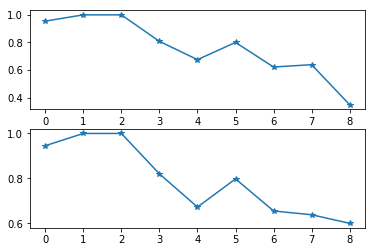

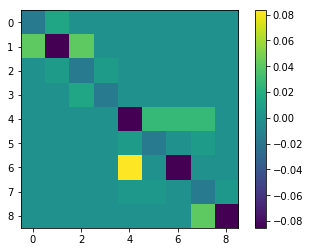

Det:-1.7927707151780854e-15
[0.954 1.    1.    0.808 0.675 0.8   0.622 0.639 0.349]
[0.946 1.    1.    0.82  0.673 0.798 0.656 0.639 0.601]
[-0.097 -0.002 -0.011 -0.026 -0.135 -0.003 -0.042 -0.021 -0.088]
[[ 0.18   0.5    0.783  0.266  0.     0.     0.     0.     0.   ]
 [-0.979  0.5    0.323 -0.168  0.     0.     0.     0.     0.   ]
 [ 0.091  0.5   -0.203 -0.505  0.     0.     0.     0.     0.   ]
 [-0.017  0.5   -0.491  0.803  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.51  -0.492  0.456  0.145 -0.002]
 [ 0.     0.     0.     0.    -0.03  -0.51  -0.116  0.707  0.007]
 [ 0.     0.     0.     0.    -0.859 -0.499  0.879  0.188  0.062]
 [ 0.     0.     0.     0.    -0.021 -0.445 -0.055 -0.559 -0.069]
 [ 0.     0.     0.     0.     0.017 -0.226 -0.053 -0.362  0.996]]


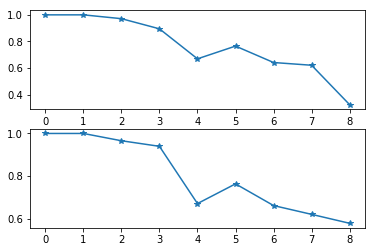

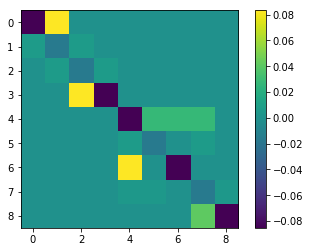

Det:-8.954337291321377e-15
[1.    1.    0.971 0.895 0.67  0.765 0.642 0.621 0.325]
[1.    1.    0.966 0.94  0.671 0.764 0.662 0.621 0.579]
[-0.002 -0.015 -0.094 -0.093 -0.135 -0.003 -0.042 -0.021 -0.088]
[[ 0.5   -0.541 -0.703  0.704  0.     0.     0.     0.     0.   ]
 [ 0.5   -0.455  0.074 -0.062  0.     0.     0.     0.     0.   ]
 [ 0.5    0.455 -0.074 -0.062  0.     0.     0.     0.     0.   ]
 [ 0.5    0.541  0.703  0.704  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.51  -0.492  0.456  0.145 -0.002]
 [ 0.     0.     0.     0.    -0.03  -0.51  -0.116  0.707  0.007]
 [ 0.     0.     0.     0.    -0.859 -0.499  0.879  0.188  0.062]
 [ 0.     0.     0.     0.    -0.021 -0.445 -0.055 -0.559 -0.069]
 [ 0.     0.     0.     0.     0.017 -0.226 -0.053 -0.362  0.996]]


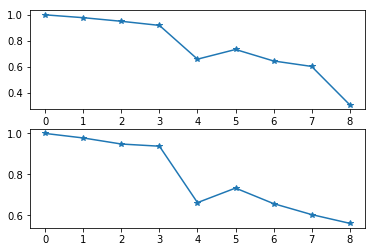

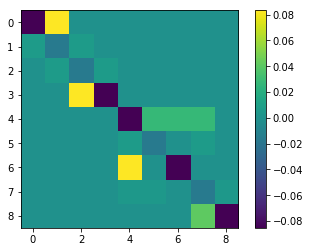

Det:-8.954337291321377e-15
[1.    0.978 0.951 0.919 0.66  0.734 0.646 0.604 0.31 ]
[1.    0.978 0.948 0.938 0.662 0.733 0.657 0.603 0.56 ]
[-0.002 -0.015 -0.094 -0.093 -0.135 -0.003 -0.042 -0.021 -0.088]
[[ 0.5   -0.541 -0.703  0.704  0.     0.     0.     0.     0.   ]
 [ 0.5   -0.455  0.074 -0.062  0.     0.     0.     0.     0.   ]
 [ 0.5    0.455 -0.074 -0.062  0.     0.     0.     0.     0.   ]
 [ 0.5    0.541  0.703  0.704  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.51  -0.492  0.456  0.145 -0.002]
 [ 0.     0.     0.     0.    -0.03  -0.51  -0.116  0.707  0.007]
 [ 0.     0.     0.     0.    -0.859 -0.499  0.879  0.188  0.062]
 [ 0.     0.     0.     0.    -0.021 -0.445 -0.055 -0.559 -0.069]
 [ 0.     0.     0.     0.     0.017 -0.226 -0.053 -0.362  0.996]]


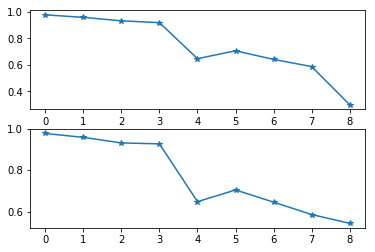

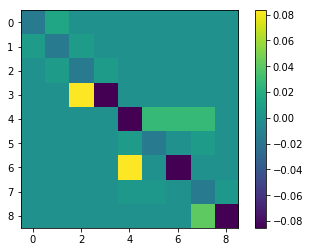

Det:-2.075494136686669e-15
[0.977 0.958 0.932 0.918 0.646 0.706 0.641 0.587 0.298]
[0.977 0.958 0.931 0.927 0.648 0.704 0.645 0.586 0.543]
[-0.002 -0.012 -0.028 -0.093 -0.135 -0.003 -0.042 -0.021 -0.088]
[[-0.5    0.638  0.737 -0.002  0.     0.     0.     0.     0.   ]
 [-0.5    0.218 -0.585  0.009  0.     0.     0.     0.     0.   ]
 [-0.5   -0.489  0.192 -0.096  0.     0.     0.     0.     0.   ]
 [-0.5   -0.553  0.28   0.995  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.51  -0.492  0.456  0.145 -0.002]
 [ 0.     0.     0.     0.    -0.03  -0.51  -0.116  0.707  0.007]
 [ 0.     0.     0.     0.    -0.859 -0.499  0.879  0.188  0.062]
 [ 0.     0.     0.     0.    -0.021 -0.445 -0.055 -0.559 -0.069]
 [ 0.     0.     0.     0.     0.017 -0.226 -0.053 -0.362  0.996]]


In [126]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(0.1,0.85,0.98,a,vertices,10)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

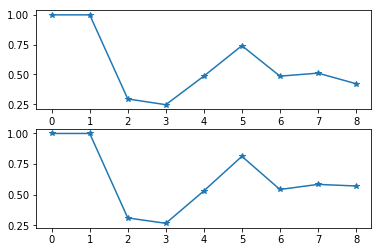

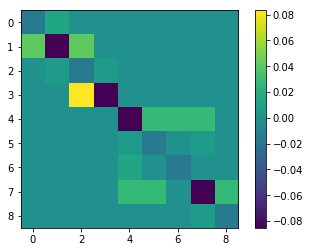

Det:-1.4179045716958798e-15
[1.    1.    0.295 0.246 0.486 0.741 0.486 0.511 0.422]
[1.    1.    0.31  0.266 0.531 0.813 0.542 0.584 0.571]
[-0.002 -0.012 -0.1   -0.09  -0.116 -0.071 -0.003 -0.014 -0.017]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.716  0.653  0.491 -0.153  0.   ]
 [ 0.     0.     0.     0.     0.002 -0.185  0.497  0.163 -0.577]
 [ 0.     0.     0.     0.     0.106 -0.178  0.54  -0.775  0.577]
 [ 0.     0.     0.     0.     0.688  0.706  0.411  0.217  0.   ]
 [ 0.     0.     0.     0.    -0.051 -0.096  0.226  0.55   0.577]]


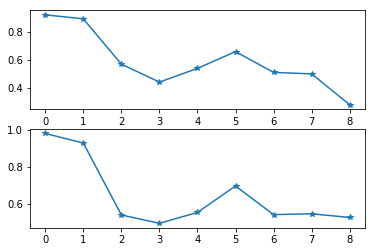

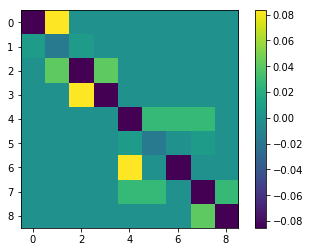

Det:-1.19428539395365e-13
[0.924 0.895 0.571 0.442 0.541 0.66  0.512 0.501 0.28 ]
[0.98  0.928 0.54  0.495 0.554 0.697 0.542 0.547 0.527]
[-0.002 -0.032 -0.093 -0.146 -0.144 -0.114 -0.004 -0.058 -0.037]
[[-0.5    0.224 -0.991 -0.05   0.     0.     0.     0.     0.   ]
 [-0.5    0.144  0.094  0.036  0.     0.     0.     0.     0.   ]
 [-0.5   -0.52   0.009 -0.585  0.     0.     0.     0.     0.   ]
 [-0.5   -0.811 -0.096  0.809  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.519 -0.214 -0.495 -0.19   0.456]
 [ 0.     0.     0.     0.    -0.009  0.049 -0.524 -0.044 -0.248]
 [ 0.     0.     0.     0.    -0.733  0.612 -0.506 -0.578  0.792]
 [ 0.     0.     0.     0.    -0.36  -0.436 -0.421  0.435  0.242]
 [ 0.     0.     0.     0.     0.254  0.623 -0.215  0.662  0.211]]


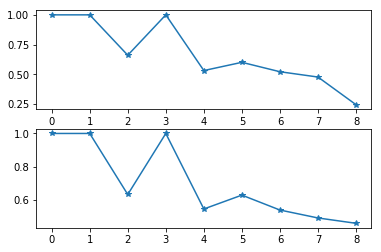

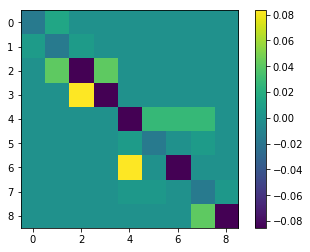

Det:-7.194228804923612e-15
[1.    1.    0.661 1.    0.532 0.601 0.522 0.478 0.245]
[1.    1.    0.632 1.    0.544 0.628 0.538 0.49  0.458]
[-0.002 -0.02  -0.036 -0.145 -0.135 -0.003 -0.042 -0.021 -0.088]
[[ 0.5   -0.567  0.189 -0.004  0.     0.     0.     0.     0.   ]
 [ 0.5    0.139 -0.252  0.034  0.     0.     0.     0.     0.   ]
 [ 0.5    0.499  0.481 -0.585  0.     0.     0.     0.     0.   ]
 [ 0.5    0.64   0.818  0.81   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.51  -0.492  0.456  0.145 -0.002]
 [ 0.     0.     0.     0.    -0.03  -0.51  -0.116  0.707  0.007]
 [ 0.     0.     0.     0.    -0.859 -0.499  0.879  0.188  0.062]
 [ 0.     0.     0.     0.    -0.021 -0.445 -0.055 -0.559 -0.069]
 [ 0.     0.     0.     0.     0.017 -0.226 -0.053 -0.362  0.996]]


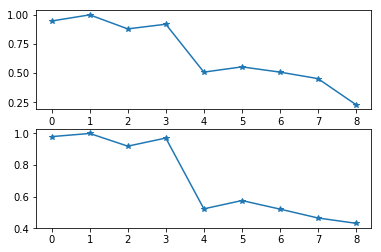

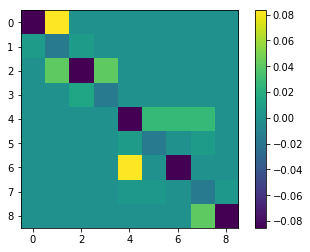

Det:-7.510247000621816e-15
[0.948 1.    0.88  0.92  0.509 0.554 0.509 0.453 0.229]
[0.98  1.    0.92  0.971 0.523 0.575 0.521 0.465 0.431]
[-0.1   -0.09  -0.002 -0.012 -0.135 -0.003 -0.042 -0.021 -0.088]
[[-0.696 -0.89  -0.5   -0.444  0.     0.     0.     0.     0.   ]
 [ 0.123  0.045 -0.5   -0.388  0.     0.     0.     0.     0.   ]
 [-0.696  0.445 -0.5    0.222  0.     0.     0.     0.     0.   ]
 [ 0.123 -0.09  -0.5    0.776  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.51  -0.492  0.456  0.145 -0.002]
 [ 0.     0.     0.     0.    -0.03  -0.51  -0.116  0.707  0.007]
 [ 0.     0.     0.     0.    -0.859 -0.499  0.879  0.188  0.062]
 [ 0.     0.     0.     0.    -0.021 -0.445 -0.055 -0.559 -0.069]
 [ 0.     0.     0.     0.     0.017 -0.226 -0.053 -0.362  0.996]]


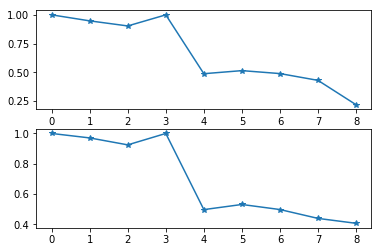

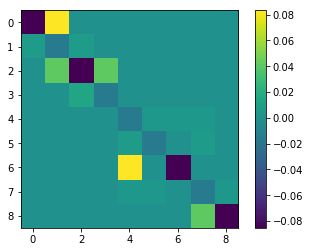

Det:-1.8692776210905954e-15
[1.    0.948 0.903 1.    0.487 0.514 0.488 0.429 0.216]
[1.    0.971 0.925 1.    0.498 0.532 0.498 0.44  0.408]
[-0.1   -0.09  -0.002 -0.012 -0.003 -0.017 -0.022 -0.091 -0.088]
[[-0.696 -0.89  -0.5   -0.444  0.     0.     0.     0.     0.   ]
 [ 0.123  0.045 -0.5   -0.388  0.     0.     0.     0.     0.   ]
 [-0.696  0.445 -0.5    0.222  0.     0.     0.     0.     0.   ]
 [ 0.123 -0.09  -0.5    0.776  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.508 -0.505  0.194  0.067 -0.004]
 [ 0.     0.     0.     0.    -0.496  0.162 -0.832 -0.006  0.007]
 [ 0.     0.     0.     0.    -0.513 -0.617  0.254 -0.996  0.122]
 [ 0.     0.     0.     0.    -0.431  0.496  0.379 -0.008 -0.068]
 [ 0.     0.     0.     0.    -0.217  0.303  0.248  0.059  0.99 ]]


In [127]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(0.1,0.85,0.98,a,vertices,20)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

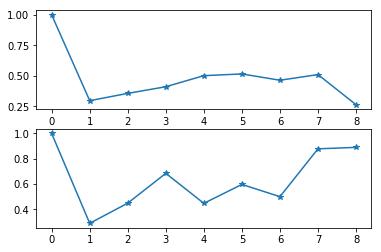

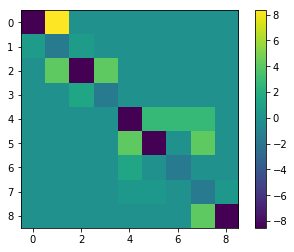

Det:-7126.995116295542
[1.    0.296 0.356 0.411 0.502 0.516 0.464 0.51  0.263]
[1.    0.291 0.45  0.685 0.448 0.598 0.501 0.879 0.89 ]
[-10.     -8.95   -0.2    -1.25  -12.133  -8.859  -6.183  -0.338  -1.417]
[[-0.696 -0.89  -0.5   -0.444  0.     0.     0.     0.     0.   ]
 [ 0.123  0.045 -0.5   -0.388  0.     0.     0.     0.     0.   ]
 [-0.696  0.445 -0.5    0.222  0.     0.     0.     0.     0.   ]
 [ 0.123 -0.09  -0.5    0.776  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.648  0.071 -0.556 -0.492  0.152]
 [ 0.     0.     0.     0.     0.756  0.084 -0.773 -0.472 -0.126]
 [ 0.     0.     0.     0.     0.091 -0.015  0.181 -0.543  0.883]
 [ 0.     0.     0.     0.    -0.005 -0.078  0.121 -0.436 -0.368]
 [ 0.     0.     0.     0.     0.006  0.991  0.215 -0.222 -0.215]]


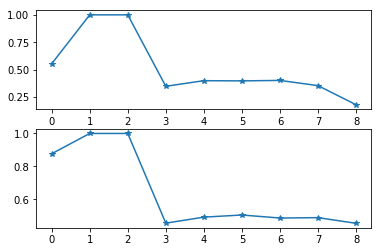

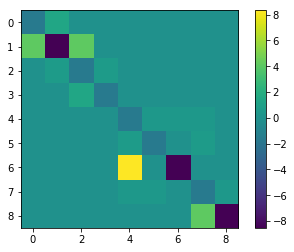

Det:-446.21517472747445
[0.553 1.    1.    0.348 0.399 0.397 0.401 0.354 0.18 ]
[0.877 1.    1.    0.454 0.491 0.504 0.485 0.488 0.453]
[-9.683 -0.2   -1.063 -2.595 -0.28  -1.71  -2.175 -9.088 -8.817]
[[ 0.18   0.5    0.783  0.266  0.     0.     0.     0.     0.   ]
 [-0.979  0.5    0.323 -0.168  0.     0.     0.     0.     0.   ]
 [ 0.091  0.5   -0.203 -0.505  0.     0.     0.     0.     0.   ]
 [-0.017  0.5   -0.491  0.803  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.508 -0.505  0.194  0.067 -0.004]
 [ 0.     0.     0.     0.    -0.496  0.162 -0.832 -0.006  0.007]
 [ 0.     0.     0.     0.    -0.513 -0.617  0.254 -0.996  0.122]
 [ 0.     0.     0.     0.    -0.431  0.496  0.379 -0.008 -0.068]
 [ 0.     0.     0.     0.    -0.217  0.303  0.248  0.059  0.99 ]]


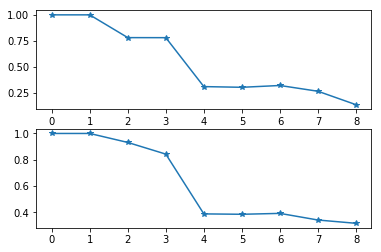

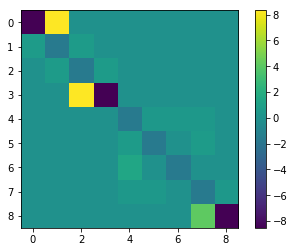

Det:-472.7163048171621
[1.    1.    0.78  0.78  0.307 0.301 0.318 0.262 0.133]
[1.    1.    0.932 0.843 0.389 0.386 0.393 0.342 0.317]
[-0.2   -1.53  -9.405 -9.265 -8.819 -0.272 -2.72  -1.287 -2.113]
[[ 0.5   -0.541 -0.703  0.704  0.     0.     0.     0.     0.   ]
 [ 0.5   -0.455  0.074 -0.062  0.     0.     0.     0.     0.   ]
 [ 0.5    0.455 -0.074 -0.062  0.     0.     0.     0.     0.   ]
 [ 0.5    0.541  0.703  0.704  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


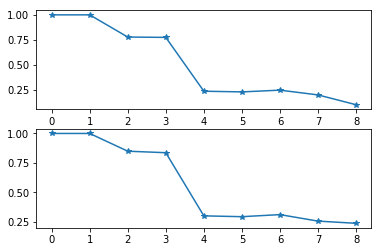

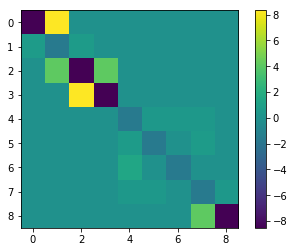

Det:-1532.4761300319867
[1.    1.    0.778 0.774 0.235 0.228 0.246 0.198 0.1  ]
[1.    1.    0.849 0.836 0.299 0.292 0.31  0.255 0.236]
[ -0.2    -3.187  -9.323 -14.551  -8.819  -0.272  -2.72   -1.287  -2.113]
[[-0.5    0.224 -0.991 -0.05   0.     0.     0.     0.     0.   ]
 [-0.5    0.144  0.094  0.036  0.     0.     0.     0.     0.   ]
 [-0.5   -0.52   0.009 -0.585  0.     0.     0.     0.     0.   ]
 [-0.5   -0.811 -0.096  0.809  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


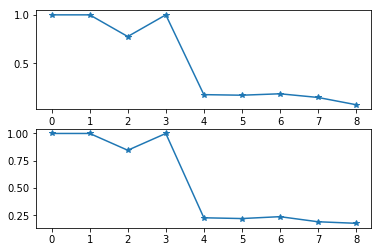

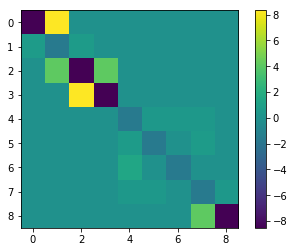

Det:-1532.4761300319867
[1.    1.    0.777 1.    0.179 0.174 0.188 0.15  0.076]
[1.    1.    0.846 1.    0.229 0.222 0.239 0.192 0.178]
[ -0.2    -3.187  -9.323 -14.551  -8.819  -0.272  -2.72   -1.287  -2.113]
[[-0.5    0.224 -0.991 -0.05   0.     0.     0.     0.     0.   ]
 [-0.5    0.144  0.094  0.036  0.     0.     0.     0.     0.   ]
 [-0.5   -0.52   0.009 -0.585  0.     0.     0.     0.     0.   ]
 [-0.5   -0.811 -0.096  0.809  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


In [128]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(10,0.85,0.98,a,vertices,1)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

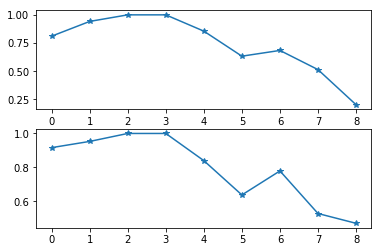

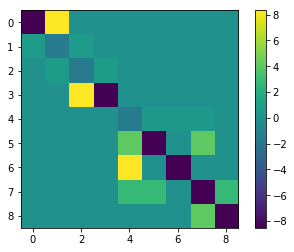

Det:-41824.85746281839
[0.811 0.942 1.    1.    0.855 0.633 0.684 0.514 0.202]
[0.917 0.953 1.    1.    0.84  0.638 0.78  0.529 0.471]
[ -0.2    -1.53   -9.405  -9.265  -0.344  -4.331 -13.341  -9.244  -8.53 ]
[[ 0.5   -0.541 -0.703  0.704  0.     0.     0.     0.     0.   ]
 [ 0.5   -0.455  0.074 -0.062  0.     0.     0.     0.     0.   ]
 [ 0.5    0.455 -0.074 -0.062  0.     0.     0.     0.     0.   ]
 [ 0.5    0.541  0.703  0.704  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.525 -0.141 -0.004  0.08   0.   ]
 [ 0.     0.     0.     0.    -0.476  0.45  -0.545 -0.27  -0.577]
 [ 0.     0.     0.     0.    -0.534 -0.279  0.007 -0.938  0.577]
 [ 0.     0.     0.     0.    -0.41   0.594  0.634 -0.034 -0.   ]
 [ 0.     0.     0.     0.    -0.209  0.589 -0.549  0.199  0.577]]


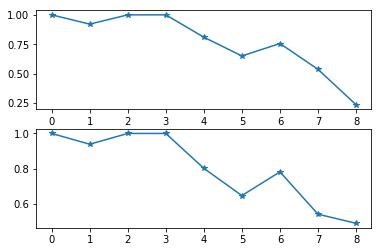

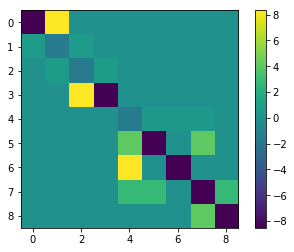

Det:-41824.85746281839
[1.    0.921 1.    1.    0.81  0.65  0.756 0.536 0.234]
[1.    0.939 1.    1.    0.802 0.648 0.782 0.543 0.491]
[ -0.2    -1.53   -9.405  -9.265  -0.344  -4.331 -13.341  -9.244  -8.53 ]
[[ 0.5   -0.541 -0.703  0.704  0.     0.     0.     0.     0.   ]
 [ 0.5   -0.455  0.074 -0.062  0.     0.     0.     0.     0.   ]
 [ 0.5    0.455 -0.074 -0.062  0.     0.     0.     0.     0.   ]
 [ 0.5    0.541  0.703  0.704  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.525 -0.141 -0.004  0.08   0.   ]
 [ 0.     0.     0.     0.    -0.476  0.45  -0.545 -0.27  -0.577]
 [ 0.     0.     0.     0.    -0.534 -0.279  0.007 -0.938  0.577]
 [ 0.     0.     0.     0.    -0.41   0.594  0.634 -0.034 -0.   ]
 [ 0.     0.     0.     0.    -0.209  0.589 -0.549  0.199  0.577]]


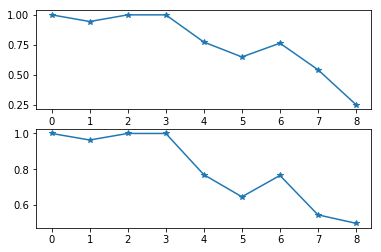

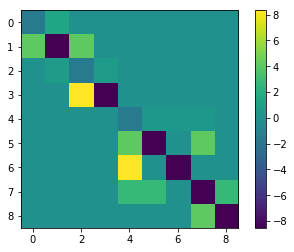

Det:-35079.64912333718
[1.    0.945 1.    1.    0.773 0.649 0.764 0.543 0.251]
[1.    0.963 1.    1.    0.769 0.646 0.765 0.545 0.497]
[ -0.2    -1.25  -10.     -8.95   -0.344  -4.331 -13.341  -9.244  -8.53 ]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.525 -0.141 -0.004  0.08   0.   ]
 [ 0.     0.     0.     0.    -0.476  0.45  -0.545 -0.27  -0.577]
 [ 0.     0.     0.     0.    -0.534 -0.279  0.007 -0.938  0.577]
 [ 0.     0.     0.     0.    -0.41   0.594  0.634 -0.034 -0.   ]
 [ 0.     0.     0.     0.    -0.209  0.589 -0.549  0.199  0.577]]


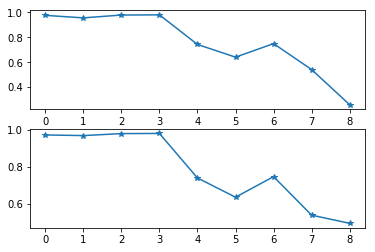

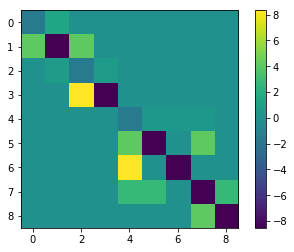

Det:-35079.64912333718
[0.975 0.955 0.978 0.979 0.742 0.64  0.749 0.541 0.259]
[0.972 0.968 0.979 0.98  0.74  0.636 0.747 0.539 0.495]
[ -0.2    -1.25  -10.     -8.95   -0.344  -4.331 -13.341  -9.244  -8.53 ]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.525 -0.141 -0.004  0.08   0.   ]
 [ 0.     0.     0.     0.    -0.476  0.45  -0.545 -0.27  -0.577]
 [ 0.     0.     0.     0.    -0.534 -0.279  0.007 -0.938  0.577]
 [ 0.     0.     0.     0.    -0.41   0.594  0.634 -0.034 -0.   ]
 [ 0.     0.     0.     0.    -0.209  0.589 -0.549  0.199  0.577]]


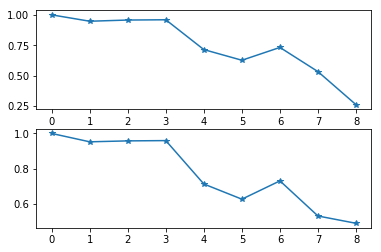

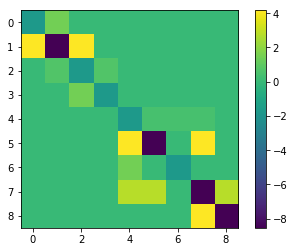

Det:-1817.5856047734082
[1.    0.948 0.957 0.96  0.714 0.627 0.732 0.533 0.261]
[1.    0.952 0.958 0.959 0.713 0.626 0.73  0.531 0.489]
[ -9.683  -0.2    -1.063  -2.595  -0.317  -2.041  -4.543  -8.688 -13.34 ]
[[ 0.18   0.5    0.783  0.266  0.     0.     0.     0.     0.   ]
 [-0.979  0.5    0.323 -0.168  0.     0.     0.     0.     0.   ]
 [ 0.091  0.5   -0.203 -0.505  0.     0.     0.     0.     0.   ]
 [-0.017  0.5   -0.491  0.803  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.517 -0.209  0.194 -0.054 -0.004]
 [ 0.     0.     0.     0.    -0.465 -0.344 -0.431  0.731 -0.545]
 [ 0.     0.     0.     0.    -0.561  0.829 -0.099  0.011  0.   ]
 [ 0.     0.     0.     0.    -0.401 -0.326 -0.606  0.026  0.634]
 [ 0.     0.     0.     0.    -0.203 -0.21  -0.633 -0.679 -0.549]]


In [129]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(10,0.85,0.98,a,vertices,0.1)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

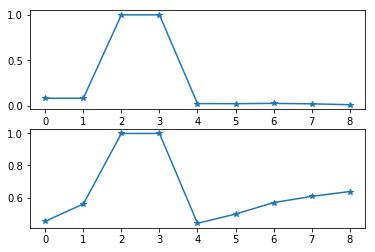

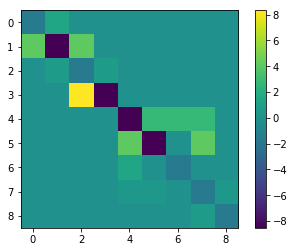

Det:-1454.7120138039866
[0.083 0.083 1.    1.    0.024 0.023 0.026 0.021 0.012]
[0.452 0.56  1.    1.    0.439 0.497 0.568 0.607 0.637]
[ -0.2    -1.25  -10.     -8.95  -12.133  -6.29   -0.328  -1.265  -2.054]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.649  0.57   0.49  -0.232 -0.115]
 [ 0.     0.     0.     0.     0.756  0.788  0.471  0.001 -0.321]
 [ 0.     0.     0.     0.     0.091 -0.181  0.536 -0.843  0.439]
 [ 0.     0.     0.     0.    -0.005 -0.146  0.439  0.234 -0.385]
 [ 0.     0.     0.     0.     0.     0.023  0.24   0.425  0.737]]


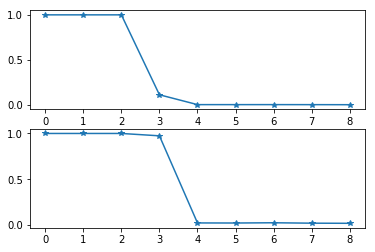

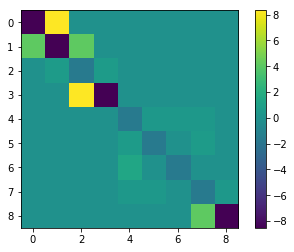

Det:-1532.4761300319867
[1.    1.    1.    0.111 0.002 0.002 0.002 0.001 0.001]
[1.    1.    1.    0.974 0.023 0.023 0.025 0.021 0.019]
[-14.551  -0.2    -3.187  -9.323  -8.819  -0.272  -2.72   -1.287  -2.113]
[[ 0.809  0.5   -0.811  0.096  0.     0.     0.     0.     0.   ]
 [-0.585  0.5   -0.52  -0.009  0.     0.     0.     0.     0.   ]
 [ 0.036  0.5    0.144 -0.094  0.     0.     0.     0.     0.   ]
 [-0.05   0.5    0.224  0.991  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


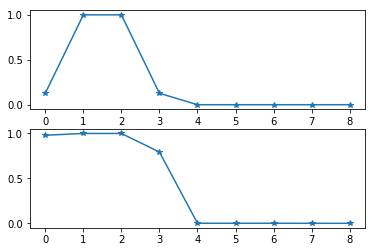

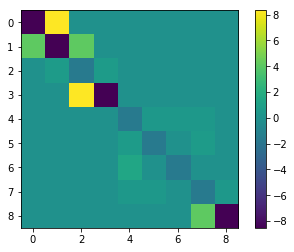

Det:-1532.4761300319867
[0.127 1.    1.    0.127 0.    0.    0.    0.    0.   ]
[0.98  1.    1.    0.794 0.002 0.002 0.002 0.001 0.001]
[-14.551  -0.2    -3.187  -9.323  -8.819  -0.272  -2.72   -1.287  -2.113]
[[ 0.809  0.5   -0.811  0.096  0.     0.     0.     0.     0.   ]
 [-0.585  0.5   -0.52  -0.009  0.     0.     0.     0.     0.   ]
 [ 0.036  0.5    0.144 -0.094  0.     0.     0.     0.     0.   ]
 [-0.05   0.5    0.224  0.991  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


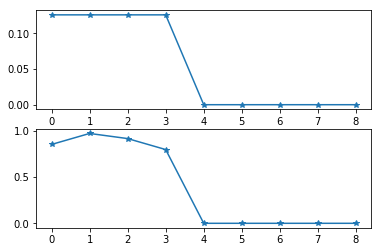

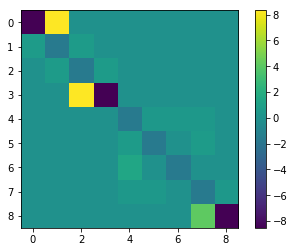

Det:-472.7163048171621
[0.126 0.126 0.126 0.126 0.    0.    0.    0.    0.   ]
[0.852 0.97  0.915 0.797 0.    0.    0.    0.    0.   ]
[-0.2   -1.53  -9.405 -9.265 -8.819 -0.272 -2.72  -1.287 -2.113]
[[ 0.5   -0.541 -0.703  0.704  0.     0.     0.     0.     0.   ]
 [ 0.5   -0.455  0.074 -0.062  0.     0.     0.     0.     0.   ]
 [ 0.5    0.455 -0.074 -0.062  0.     0.     0.     0.     0.   ]
 [ 0.5    0.541  0.703  0.704  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


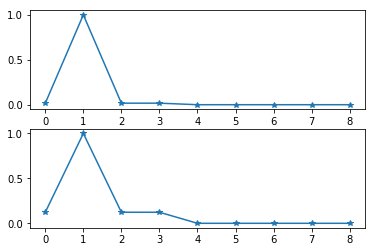

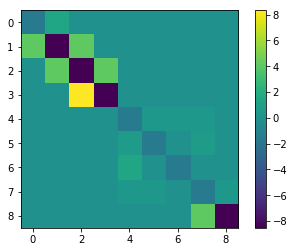

Det:-1100.4707578436676
[0.017 1.    0.017 0.017 0.    0.    0.    0.    0.   ]
[0.123 1.    0.123 0.123 0.    0.    0.    0.    0.   ]
[ -0.2    -2.161  -9.079 -15.819  -8.819  -0.272  -2.72   -1.287  -2.113]
[[-0.5    0.37  -0.138 -0.039  0.     0.     0.     0.     0.   ]
 [-0.5   -0.124  0.696  0.371  0.     0.     0.     0.     0.   ]
 [-0.5   -0.559  0.046 -0.611  0.     0.     0.     0.     0.   ]
 [-0.5   -0.731 -0.703  0.698  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


In [130]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(10,0.85,0.98,a,vertices,10)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

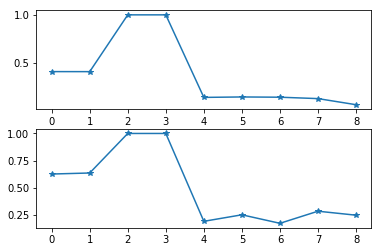

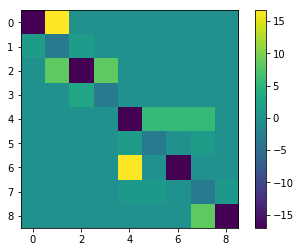

Det:-3845246.4643183667
[0.41  0.409 1.    1.    0.141 0.146 0.143 0.129 0.066]
[0.626 0.636 1.    1.    0.191 0.251 0.173 0.284 0.247]
[-20.    -17.901  -0.4    -2.499 -26.961  -0.639  -8.427  -4.2   -17.634]
[[-0.696 -0.89  -0.5   -0.444  0.     0.     0.     0.     0.   ]
 [ 0.123  0.045 -0.5   -0.388  0.     0.     0.     0.     0.   ]
 [-0.696  0.445 -0.5    0.222  0.     0.     0.     0.     0.   ]
 [ 0.123 -0.09  -0.5    0.776  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.51  -0.492  0.456  0.145 -0.002]
 [ 0.     0.     0.     0.    -0.03  -0.51  -0.116  0.707  0.007]
 [ 0.     0.     0.     0.    -0.859 -0.499  0.879  0.188  0.062]
 [ 0.     0.     0.     0.    -0.021 -0.445 -0.055 -0.559 -0.069]
 [ 0.     0.     0.     0.     0.017 -0.226 -0.053 -0.362  0.996]]


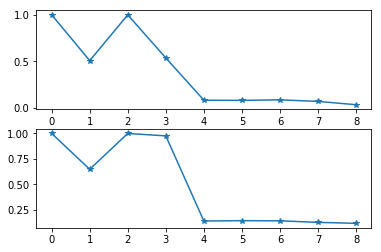

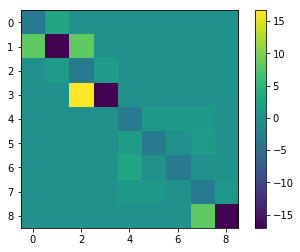

Det:-202997.79208513658
[1.    0.509 1.    0.538 0.085 0.082 0.088 0.072 0.036]
[1.    0.647 1.    0.976 0.138 0.142 0.14  0.125 0.116]
[ -0.4    -2.499 -20.    -17.901 -17.637  -0.544  -5.439  -2.574  -4.226]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


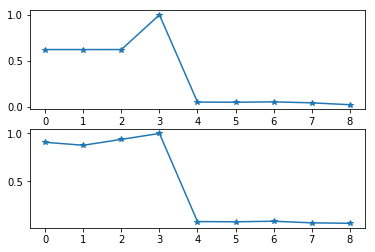

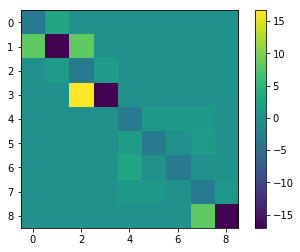

Det:-202997.79208513658
[0.622 0.622 0.622 1.    0.049 0.048 0.052 0.041 0.021]
[0.908 0.877 0.938 1.    0.082 0.08  0.086 0.07  0.064]
[ -0.4    -2.499 -20.    -17.901 -17.637  -0.544  -5.439  -2.574  -4.226]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


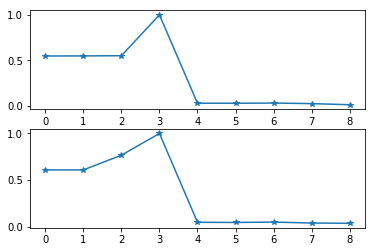

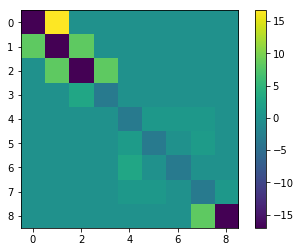

Det:-563441.0280159578
[0.548 0.549 0.551 1.    0.029 0.028 0.03  0.024 0.012]
[0.609 0.609 0.767 1.    0.048 0.046 0.05  0.04  0.037]
[-31.639 -18.159  -4.322  -0.4   -17.637  -0.544  -5.439  -2.574  -4.226]
[[-0.698 -0.703 -0.731  0.5    0.     0.     0.     0.     0.   ]
 [ 0.611  0.046 -0.559  0.5    0.     0.     0.     0.     0.   ]
 [-0.371  0.696 -0.124  0.5    0.     0.     0.     0.     0.   ]
 [ 0.039 -0.138  0.37   0.5    0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


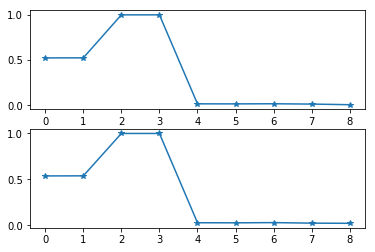

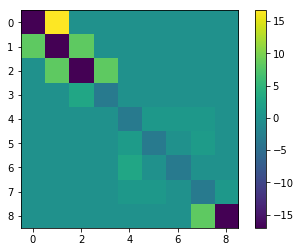

Det:-563441.0280159578
[0.524 0.525 1.    1.    0.017 0.016 0.017 0.014 0.007]
[0.537 0.538 1.    1.    0.028 0.027 0.029 0.023 0.022]
[-31.639 -18.159  -4.322  -0.4   -17.637  -0.544  -5.439  -2.574  -4.226]
[[-0.698 -0.703 -0.731  0.5    0.     0.     0.     0.     0.   ]
 [ 0.611  0.046 -0.559  0.5    0.     0.     0.     0.     0.   ]
 [-0.371  0.696 -0.124  0.5    0.     0.     0.     0.     0.   ]
 [ 0.039 -0.138  0.37   0.5    0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


In [131]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(20,0.85,0.98,a,vertices,1)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

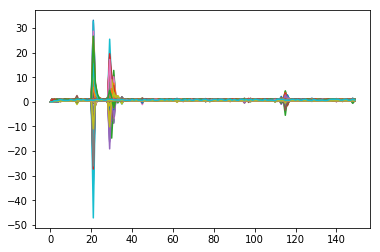

In [195]:
t=150
S=np.zeros((len(vertices),t))
S[:,0]=x_0
for i in range(1,t):
    S[:,i]=solve_1step(10,0.85,0.98,S[:,i-1],vertices)
plt.plot(S[0:].T)
plt.show()    

S.shape

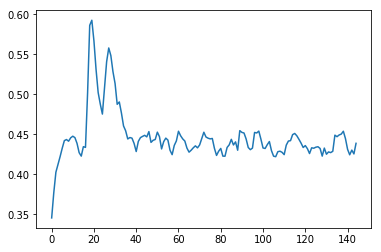

In [200]:
plt.plot(S[2][5:],'-')

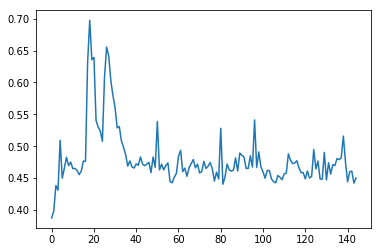

In [201]:
plt.plot(S[19][5:],'-')

In [204]:
vertices[19][1]

0

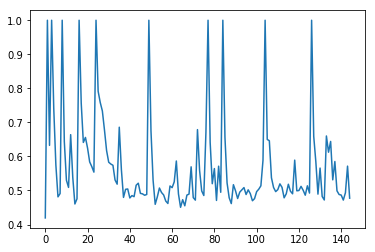

In [202]:
plt.plot(S[45][5:],'-')

In [203]:
vertices[45][1]

0.05

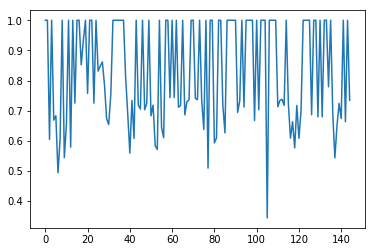

In [205]:
plt.plot(S[300][5:],'-')

In [206]:
vertices[300][1]

0.5